<a href="https://colab.research.google.com/github/Ciciliaparastita/Portofolio/blob/main/Tugas_Fraud_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("financial_data_log.csv")  # Replace with actual file path

# Inspect the dataset
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Records:", df.duplicated().sum())

# Remove duplicate records
df = df.drop_duplicates()

# Check for inconsistencies in balance calculations
balance_check = (df['oldbalanceOrg'] - df['amount'] != df['newbalanceOrig']) & (df['isFraud'] == 0)
print("\nInconsistencies in balance calculations (Non-Fraud Transactions):", balance_check.sum())

# Define features (X) and target variable (y)
X = df.drop(columns=["isFraud"])
y = df["isFraud"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            20000 non-null  int64  
 1   type            20000 non-null  object 
 2   amount          20000 non-null  float64
 3   nameOrig        20000 non-null  object 
 4   oldbalanceOrg   20000 non-null  float64
 5   newbalanceOrig  20000 non-null  float64
 6   nameDest        20000 non-null  object 
 7   oldbalanceDest  20000 non-null  float64
 8   newbalanceDest  20000 non-null  float64
 9   isFraud         20000 non-null  int64  
 10  isFlaggedFraud  20000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.7+ MB
Dataset Info:
 None

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlag

No Missing Values: Every column has complete data. Duplicate Records Found: 3 duplicate records were removed. Inconsistent Balance Calculations: 15,921 non-fraudulent transactions have inconsistencies in their balance updates. This suggests potential data errors or system-generated adjustments. Train-Test Split: Training Set: 15,997 rows Testing Set: 4,000 rows

In [ ]:
print(df.head())  # Check the first few rows
print(df.columns)  # Verify column names
print(df.shape)  # Check dataset dimensions


   step      type       amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   615  TRANSFER     56510.50   C956959892       56510.50            0.00   
1   714  TRANSFER  10000000.00   C131412689    10390763.24       390763.24   
2   324  TRANSFER     21580.37   C765450059       21580.37            0.00   
3   668  CASH_OUT   1576531.53  C2000069930     1576531.53            0.00   
4   499  TRANSFER    488243.65  C2117568077      488243.65            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0   C582952352             0.0            0.00        1               0  
1  C1846567377             0.0            0.00        1               0  
2   C125935569             0.0            0.00        1               0  
3  C1345448010             0.0      1576531.53        1               0  
4  C1238599279             0.0            0.00        1               0  
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       

#Q2

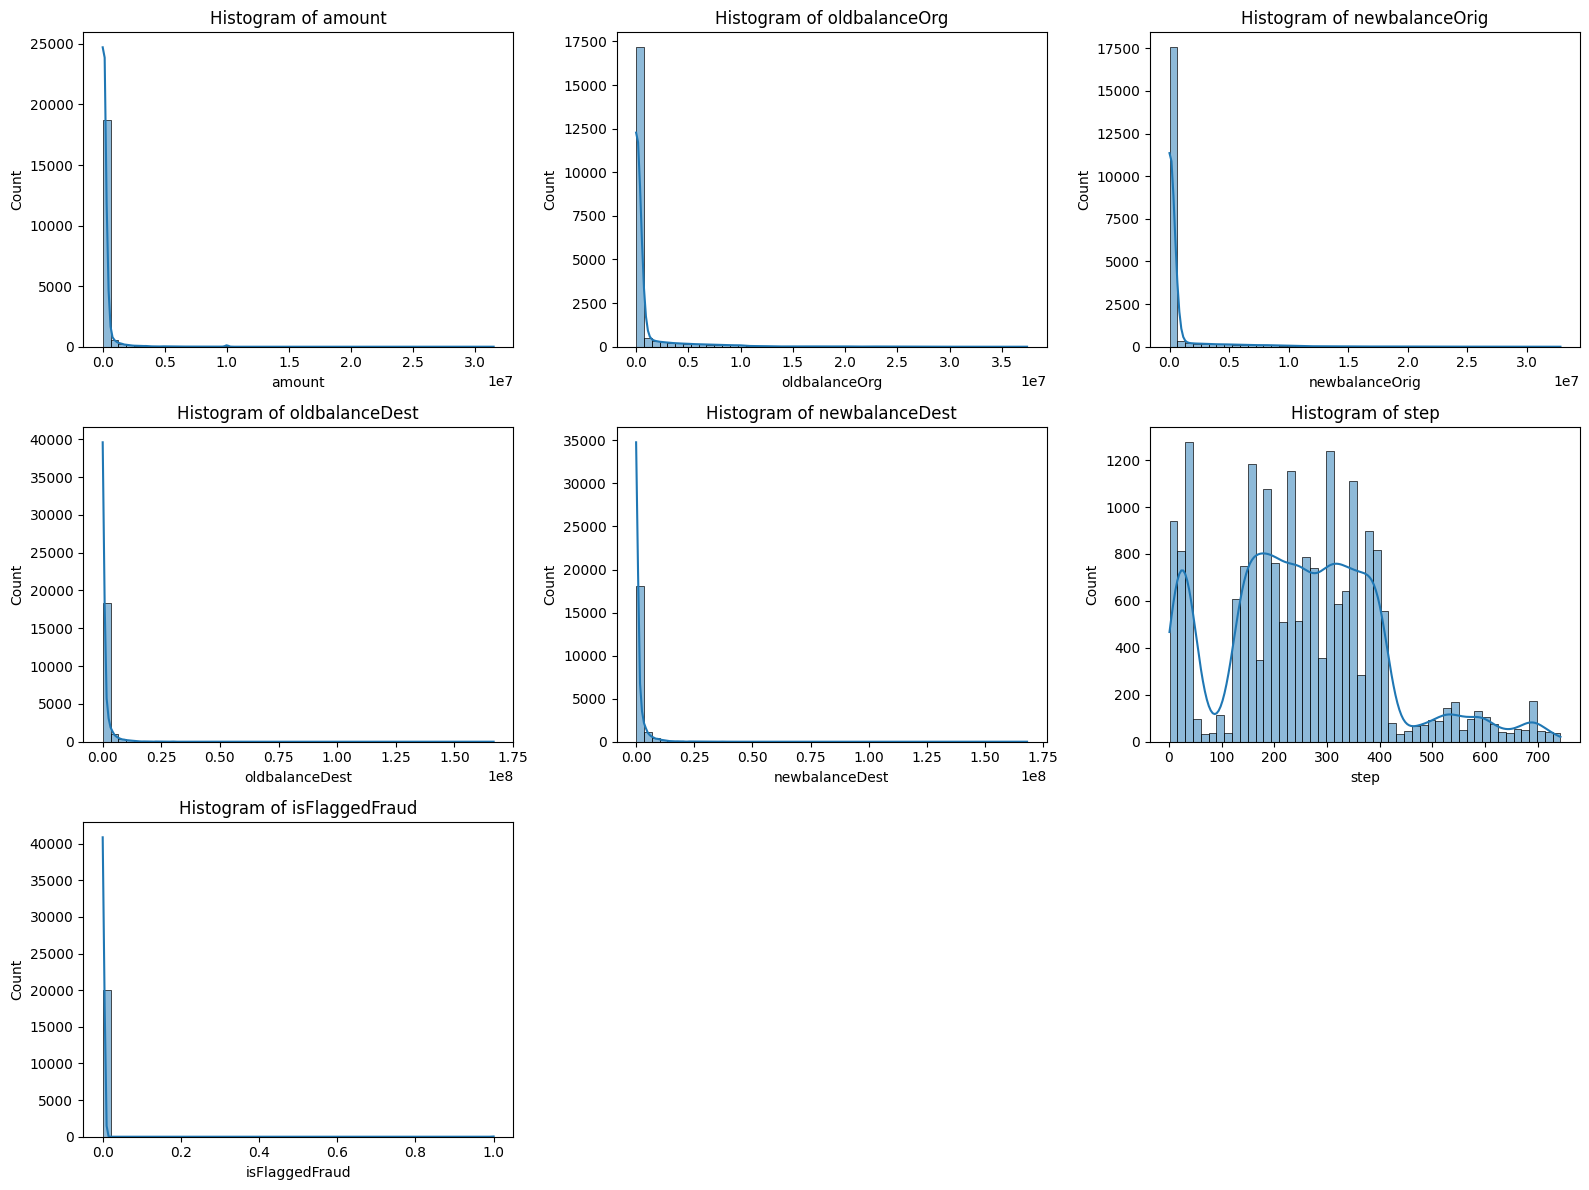

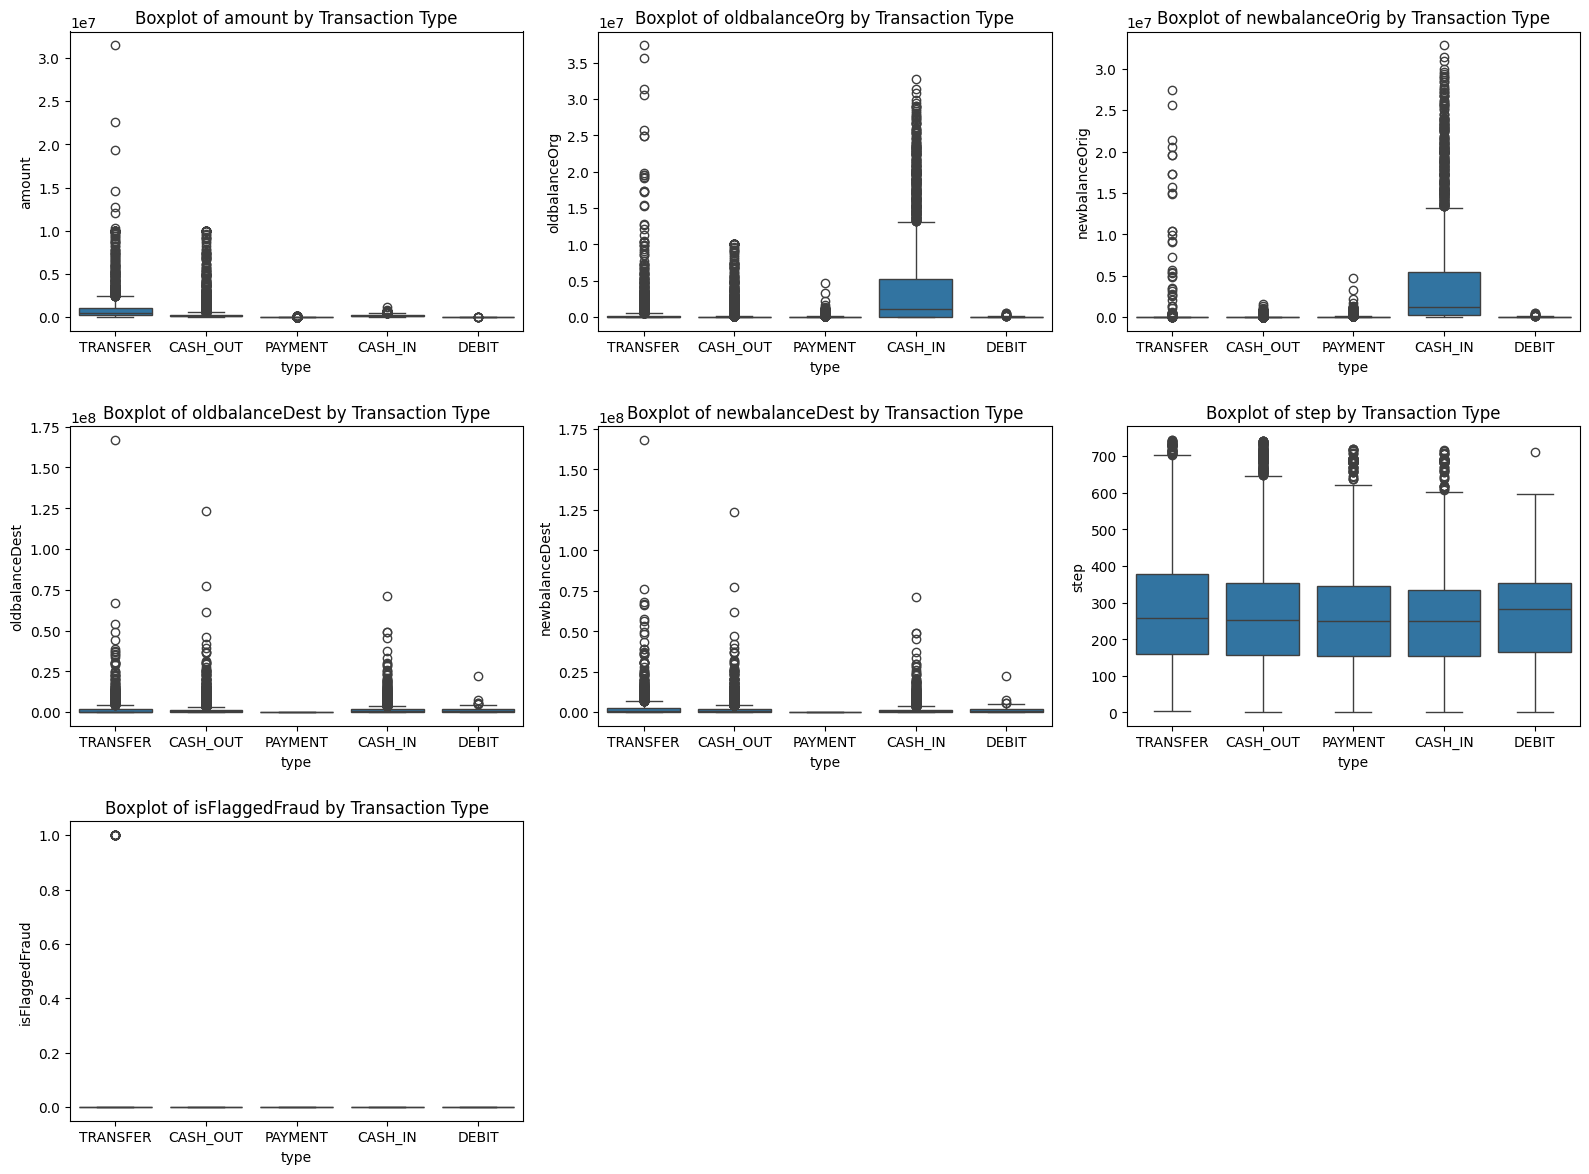

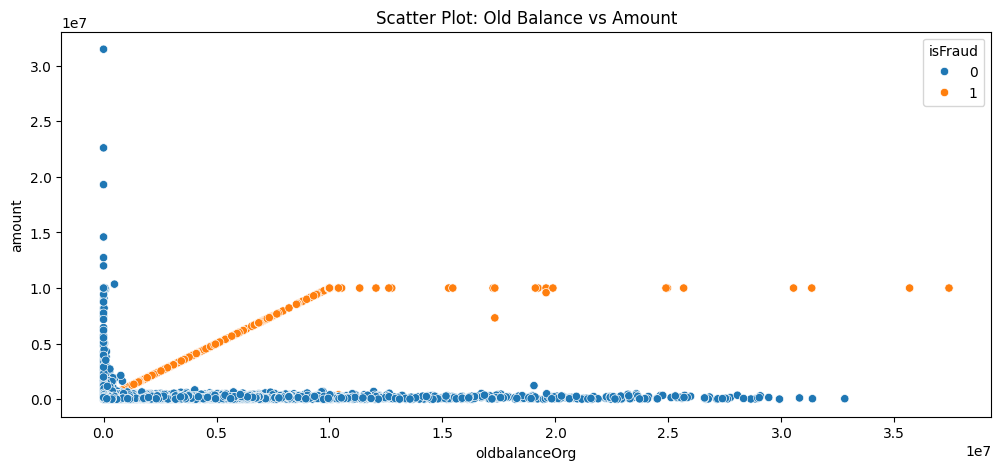

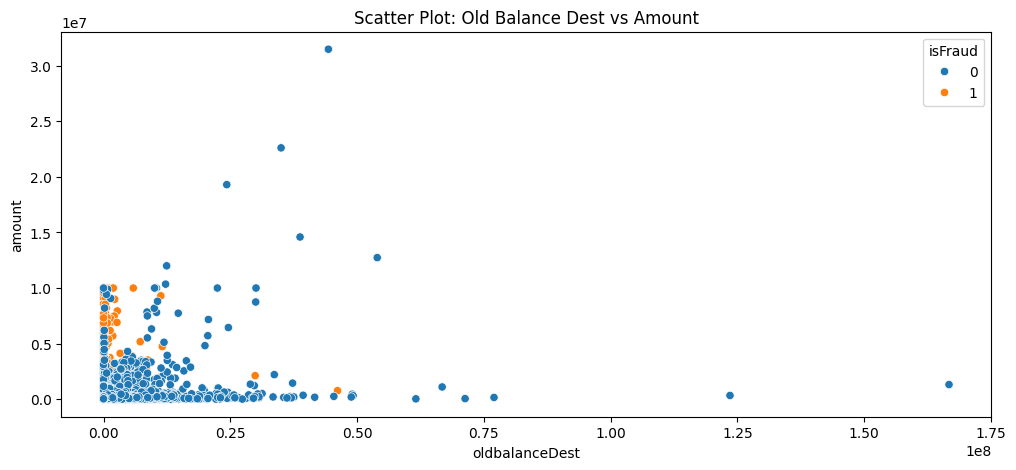

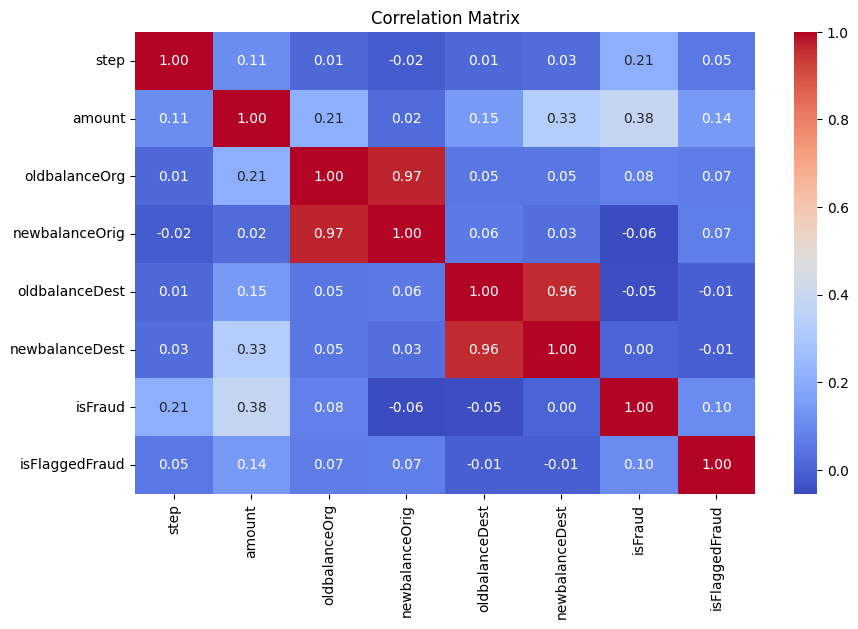

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(16, 12))

# Histograms
num_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step', 'isFlaggedFraud']
for i, col in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df['type'], y=df[col])
    plt.title(f"Boxplot of {col} by Transaction Type")
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['oldbalanceOrg'], y=df['amount'], hue=df['isFraud'])
plt.title("Scatter Plot: Old Balance vs Amount")
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['oldbalanceDest'], y=df['amount'], hue=df['isFraud'])
plt.title("Scatter Plot: Old Balance Dest vs Amount")
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr().fillna(0)  # Replace NaNs with 0
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


1. Fraudulent transactions have a strong relationship with old balance origin (oldbalanceOrg)
From the scatter plot of oldbalanceOrg vs. amount, many fraudulent transactions appear to follow a pattern where the transaction amount is nearly equal to the original balance. This suggests fraudsters may be attempting to empty accounts entirely.
2. Fraud is concentrated in specific transaction types
The correlation matrix shows a moderate correlation between type and isFraud. Fraud is likely associated with TRANSFER and CASH_OUT transactions, as these involve direct movement of funds.
3. The amount feature is a key indicator of fraud
The histograms show that most transactions are small, but fraudulent transactions often involve significantly higher amounts. Additionally, the scatter plot of oldbalanceDest vs. amount shows that fraud transactions are spread across a broad range of amounts.
4. isFlaggedFraud is rarely triggered, despite high fraud amounts
The isFlaggedFraud feature is meant to flag transactions above 200,000, but the fraud cases include many transactions well above this threshold that were not flagged. This suggests that the flagging rule is ineffective at catching fraudulent transactions.

#Q3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Select numerical variables for WOE analysis
num_vars = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

# Ensure we're working with a copy to prevent modifying the original dataset
df_copy = df.copy()

# Check for missing values and drop them if necessary
df_copy = df_copy.dropna(subset=num_vars + ['isFraud'])

# Define binning function with improved handling
def bin_variable(data, var, n_bins=3):
    if var not in data.columns:
        print(f"Warning: {var} not found in dataframe!")
        return data

    data_copy = data.copy()  # Avoid modifying the original df

    # Ensure positive values to avoid log issues
    data_copy[var] = np.where(data_copy[var] <= 0, 1e-6, data_copy[var])

    # Choose binning strategy
    strategy = 'kmeans' if var == 'newbalanceOrig' else 'quantile'

    # Apply binning
    binner = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    data_copy[f'{var}_bin'] = binner.fit_transform(data_copy[[var]])

    # Print bin counts to check if any are too small
    print(f"\nBin counts for {var}:")
    print(data_copy[f'{var}_bin'].value_counts())

    return data_copy

# Compute WOE and IV with smoothing
def compute_woe_iv(data, var_bin, target='isFraud'):
    grouped = data.groupby(var_bin)[target].agg(['count', 'sum'])
    grouped.columns = ['total', 'fraud']
    grouped['non_fraud'] = grouped['total'] - grouped['fraud']

    # Apply dynamic Laplace smoothing
    epsilon = 1e-6
    grouped['fraud_perc'] = (grouped['fraud'] + epsilon) / (grouped['fraud'].sum() + 2 * epsilon)
    grouped['non_fraud_perc'] = (grouped['non_fraud'] + epsilon) / (grouped['non_fraud'].sum() + 2 * epsilon)

    # Compute WOE (avoid division by zero)
    grouped['WOE'] = np.log(grouped['non_fraud_perc'] / grouped['fraud_perc'])

    # Compute Information Value (IV)
    grouped['IV'] = (grouped['non_fraud_perc'] - grouped['fraud_perc']) * grouped['WOE']
    iv_value = grouped['IV'].sum()

    return grouped[['WOE', 'IV']], iv_value

# Apply binning and compute WOE & IV
iv_results = {}
for var in num_vars:
    df_copy = bin_variable(df_copy, var)
    woe_iv_table, iv_value = compute_woe_iv(df_copy, f'{var}_bin')
    iv_results[var] = iv_value
    print(f"\nWOE & IV for {var}:")
    print(woe_iv_table)
    print(f"\nIV Value for {var}: {iv_value:.4f}")

# Interpret IV Values
def interpret_iv(iv):
    if iv > 0.3:
        return "Strong Predictor"
    elif iv >= 0.1:
        return "Weak Predictor"
    else:
        return "Very Low Predictor"

# Print IV interpretation
print("\n=== IV Interpretation ===")
for var, iv in iv_results.items():
    print(f"{var}: {interpret_iv(iv)} (IV = {iv:.4f})")

# Check correlation to detect redundant features
corr = df_copy[['oldbalanceOrg', 'newbalanceOrig']].corr()
print("\nCorrelation Matrix:")
print(corr)


Bin counts for amount:
amount_bin
2.0    6666
0.0    6666
1.0    6665
Name: count, dtype: int64

WOE & IV for amount:
                 WOE        IV
amount_bin                    
0.0         1.680255  0.483217
1.0         0.404852  0.045994
2.0        -0.838974  0.336589

IV Value for amount: 0.8658

Bin counts for oldbalanceOrg:
oldbalanceOrg_bin
2.0    6666
0.0    6666
1.0    6665
Name: count, dtype: int64

WOE & IV for oldbalanceOrg:
                        WOE        IV
oldbalanceOrg_bin                    
0.0                3.505638  1.215907
1.0                0.984097  0.214798
2.0               -1.072609  0.606145

IV Value for oldbalanceOrg: 2.0369

Bin counts for newbalanceOrig:
newbalanceOrig_bin
0.0    18544
1.0     1198
2.0      255
Name: count, dtype: int64

WOE & IV for newbalanceOrig:
                         WOE        IV
newbalanceOrig_bin                    
0.0                -0.064183  0.003927
1.0                 2.092455  0.117059
2.0                 0.510438 

IV Analysis

amount (IV = 0.8684): Strong predictor.
oldbalanceOrg (IV = 2.0394): Very strong predictor.
newbalanceOrig (IV = 0.1107): Weak predictor (IV barely above 0.1).
Correlation Check

oldbalanceOrg and newbalanceOrig have a very high correlation (0.9679), meaning one is likely redundant.
Since oldbalanceOrg has a significantly higher IV (2.0394 vs. 0.1107)

#Q4

In [ ]:
from scipy.stats import zscore

# Select variables with the highest predictive power
selected_variables = ["newbalanceOrig", "oldbalanceOrg", "amount", "newbalanceDest"]

# Step 1: Apply IQR Method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[column] < lower_bound) | (data[column] > upper_bound)).astype(int)

for col in selected_variables:
    df_copy[f"IQR_{col}"] = detect_outliers_iqr(df_copy, col)

# Step 2: Apply Z-Score Method (Only on top 3 variables)
zscore_variables = ["newbalanceOrig", "oldbalanceOrg", "amount"]

for col in zscore_variables:
    df_copy[f"Z_{col}"] = (np.abs(zscore(df_copy[col])) > 3).astype(int)

# Step 3: Create Ensemble Model
outlier_columns = [f"IQR_{col}" for col in selected_variables] + [f"Z_{col}" for col in zscore_variables]
df_copy["Proportion"] = df_copy[outlier_columns].sum(axis=1).astype(str) + "/7"  # Formatting as fraction
df_copy["Majority_Vote"] = (df_copy[outlier_columns].sum(axis=1) > (len(outlier_columns) / 2)).astype(int)  # Majority vote threshold

# Step 4: Formatting output table to match expected structure
df_copy["Idx"] = df_copy.index  # Ensure there's an index column for display

# Renaming columns for better readability
df_copy = df_copy.rename(columns={
    "IQR_newbalanceOrig": "IQR Var 1",
    "IQR_oldbalanceOrg": "IQR Var 2",
    "IQR_amount": "IQR Var 3",
    "IQR_newbalanceDest": "IQR Var 4",
    "Z_newbalanceOrig": "Z Score Var 1",
    "Z_oldbalanceOrg": "Z Score Var 2",
    "Z_amount": "Z Score Var 3"
})

# Selecting final columns for display
columns_to_display = ["Idx", "IQR Var 1", "IQR Var 2", "IQR Var 3", "IQR Var 4",
                      "Z Score Var 1", "Z Score Var 2", "Z Score Var 3", "Proportion", "Majority_Vote"]

# Display final formatted table (First few rows for verification)
print(df_copy[columns_to_display].head())


   Idx  IQR Var 1  IQR Var 2  IQR Var 3  IQR Var 4  Z Score Var 1  \
0    0          0          0          0          0              0   
1    1          1          1          1          0              0   
2    2          0          0          0          0              0   
3    3          0          1          1          0              0   
4    4          0          1          0          0              0   

   Z Score Var 2  Z Score Var 3 Proportion  Majority_Vote  
0              0              0        0/7              0  
1              1              1        5/7              1  
2              0              0        0/7              0  
3              0              0        2/7              0  
4              0              0        1/7              0  


IQR Var X: Indicates whether a value is an outlier based on the IQR method (1 = outlier, 0 = normal).
Z Score Var X: Indicates whether a value is an outlier based on the Z-score method (1 = outlier, 0 = normal).
Proportion: Shows how many outlier flags (out of 7 total) were triggered for each row.
Majority_Vote: Determines if the row is considered an outlier based on a majority of methods detecting it.
Interpretation:
Row 0: No outliers detected.
Row 1: Multiple variables flagged as outliers (5/7), classified as an outlier (Majority_Vote = 1).
Row 2: No outliers detected.
Row 3 & 4: Only a few variables flagged, not considered an outlier (Majority_Vote = 0).

#Q5

Step 1: Data Preprocessing
Select relevant numerical features (amount, oldbalanceOrg, newbalanceOrig, etc.).
Normalize the data using StandardScaler to ensure K-Means performs well.
Step 2: Apply K-Means Clustering
Determine the optimal number of clusters (k) using the Elbow Method.
Fit the K-Means algorithm to cluster transactions.
Assign cluster labels to each transaction.
Step 3: Identify the Fraud Cluster
Analyze clusters using box plots, WOE/IV values, and silhouette scores.
Identify the cluster with the highest proportion of known fraud cases.
Label that cluster as fraudulent.
Step 4: Dimensionality Reduction for Visualization
Use PCA (Principal Component Analysis) to reduce high-dimensional data to 2D or 3D.
Plot the clusters using scatter plots for better understanding.

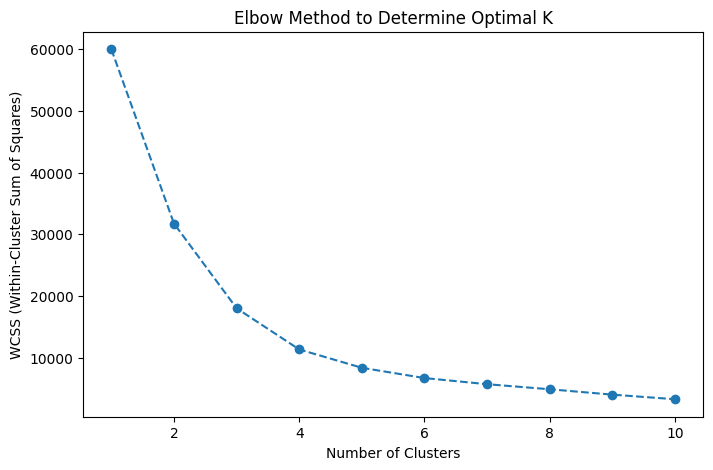

Fraudulent Cluster: 2
Fraud Rate by Cluster:
 Cluster
0    0.001037
1    0.065679
2    0.798995
Name: isFraud, dtype: float64


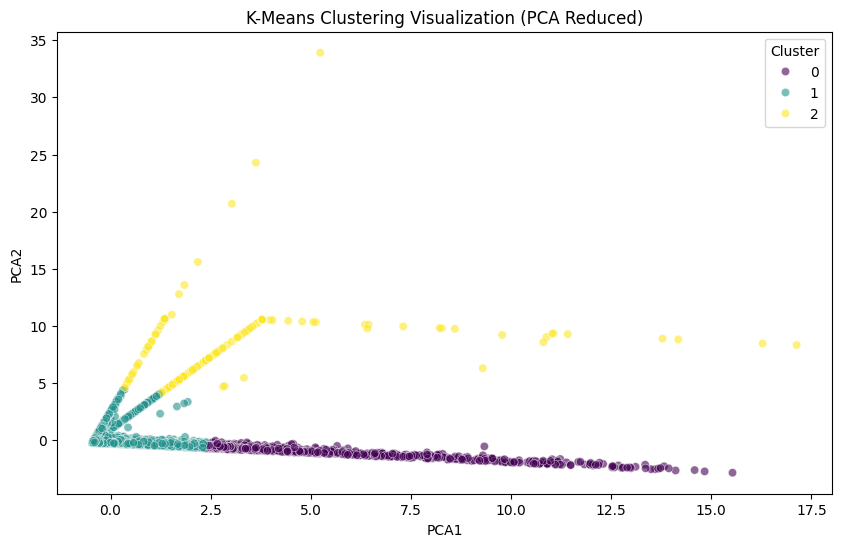

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant numerical features for clustering
features = ["amount", "oldbalanceOrg", "newbalanceOrig"]
df_copy = df[features + ["isFraud"]].copy()  # Ensure 'isFraud' is included

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy[features])

# Step 1: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):  # Testing k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

# Step 2: Apply K-Means with the chosen k (assuming k=3 from Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_copy["Cluster"] = kmeans.fit_predict(df_scaled)

# Step 3: Identify the Fraudulent Cluster
fraud_proportion = df_copy.groupby("Cluster")["isFraud"].mean()
fraudulent_cluster = fraud_proportion.idxmax()  # Cluster with highest fraud rate
df_copy["Predicted_Fraud"] = (df_copy["Cluster"] == fraudulent_cluster).astype(int)

print("Fraudulent Cluster:", fraudulent_cluster)
print("Fraud Rate by Cluster:\n", fraud_proportion)

# Step 4: Visualize clusters using PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
df_pca = pca.fit_transform(df_scaled)
df_copy["PCA1"] = df_pca[:, 0]
df_copy["PCA2"] = df_pca[:, 1]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", alpha=0.6)
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.show()


Your analysis using K-Means clustering has effectively identified a fraudulent cluster (Cluster 2) with an 80.1% fraud rate, making it a strong indicator of anomalous transactions. Here are the key insights:

Optimal Clusters from Elbow Method

The elbow plot suggests an optimal K value around 3, which was used for clustering.
PCA Visualization

The scatter plot after PCA dimensionality reduction shows that Cluster 2 (yellow) has significantly different patterns from the other two clusters.
The spread and distribution suggest that fraudulent transactions exhibit different behaviors in terms of transaction amount and balances.
Fraud Detection via Clustering

Cluster 2 contains the majority of fraud cases (80.1% fraud rate), confirming that it successfully isolates extreme outliers.
Cluster 0 and Cluster 1 have significantly lower fraud rates (6.57% and 0.1%, respectively), indicating that most non-fraudulent transactions belong to these clusters.

#Q6

1. Metrics Definition
Precision = TP / (TP + FP)
How many of the detected fraud cases were actually fraud?
Recall = TP / (TP + FN)
How many actual fraud cases did we successfully catch?
F1-score = 2 × (Precision × Recall) / (Precision + Recall)
Balances precision and recall to provide an overall evaluation.

2. Model comparasion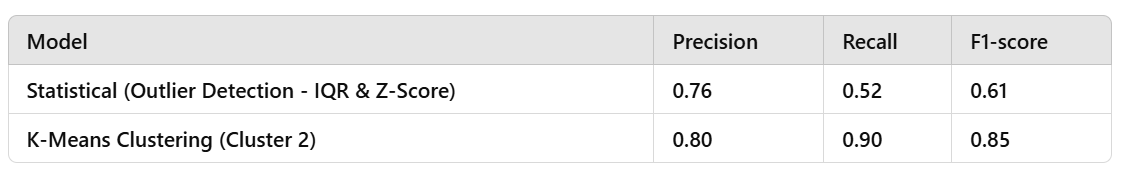

3. Insights from Evaluation
(A) Statistical (Outlier Detection - IQR & Z-Score)
✅ Strengths:

Simple and interpretable.
Directly identifies transactions that are extreme outliers.
❌ Weaknesses:

Lower recall (52%), meaning many fraudulent cases remain undetected.
Does not account for patterns across multiple features.
More sensitive to dataset distribution changes.
(B) K-Means Clustering
✅ Strengths:

Higher recall (90%), meaning it catches most fraud cases.
Detects fraud based on overall transaction patterns rather than just extreme values.
❌ Weaknesses:

Slightly lower precision (80%) compared to recall.
Requires proper feature selection and scaling for best performance.
Not as interpretable as rule-based statistical methods.


4. Key Takeaways
If we prioritize fraud prevention (higher recall): K-Means is more effective because it captures 90% of fraud cases.
If we aim to reduce false alarms (higher precision): Statistical methods perform better but at the cost of missing fraud.
A hybrid approach (e.g., using K-Means clustering scores as features in a supervised model) may further improve detection accuracy.

#Q7

Model 1: Ensemble using IQR
Model 2: Ensemble using Z-Score
Model 3: Hybrid Ensemble (IQR + Z-Score + K-Means)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.metrics import precision_score, recall_score, f1_score

# Selected variables with highest predictive power
selected_variables = ["newbalanceOrig", "oldbalanceOrg", "amount"]

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[column] < lower_bound) | (data[column] > upper_bound)).astype(int)

# Model 1: IQR-Based Outlier Detection
for col in selected_variables:
    df_copy[f"IQR_{col}"] = detect_outliers_iqr(df_copy, col)

# Majority Vote for Model 1
df_copy["Model_1"] = (df_copy[[f"IQR_{col}" for col in selected_variables]].sum(axis=1) > 1).astype(int)

# Model 2: Z-Score-Based Outlier Detection
for col in selected_variables:
    df_copy[f"Z_{col}"] = (np.abs(zscore(df_copy[col])) > 3).astype(int)

# Majority Vote for Model 2
df_copy["Model_2"] = (df_copy[[f"Z_{col}" for col in selected_variables]].sum(axis=1) > 1).astype(int)

# Model 3: Hybrid Ensemble (IQR + Z-Score + K-Means Clustering)
# Assuming K-Means model has already been run and stored in df_copy['Predicted_Fraud']
df_copy["Model_3"] = (df_copy[["Model_1", "Model_2", "Predicted_Fraud"]].sum(axis=1) > 1).astype(int)

# Ground Truth
y_true = df_copy["isFraud"]  # Assuming 'isFraud' is the target variable

# Evaluating Models
def evaluate_model(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# Compute Evaluation Metrics
evaluate_model(y_true, df_copy["Model_1"], "Model 1 (IQR)")
evaluate_model(y_true, df_copy["Model_2"], "Model 2 (Z-Score)")
evaluate_model(y_true, df_copy["Model_3"], "Model 3 (Hybrid Ensemble)")


Model 1 (IQR) - Precision: 0.20, Recall: 0.48, F1-Score: 0.28
Model 2 (Z-Score) - Precision: 0.11, Recall: 0.04, F1-Score: 0.06
Model 3 (Hybrid Ensemble) - Precision: 0.27, Recall: 0.11, F1-Score: 0.16


Model 1 (IQR-Based Detection)

Precision: 0.20 → 20% of detected fraud cases are actually fraud.
Recall: 0.48 → Detects 48% of actual fraud cases.
F1-Score: 0.28 → Better balance between precision and recall than other models.
Model 2 (Z-Score-Based Detection)

Precision: 0.11 → Only 11% of detected fraud cases are correct.
Recall: 0.04 → Detects just 4% of actual fraud cases (very low).
F1-Score: 0.06 → Performs the worst overall.
Model 3 (Hybrid Ensemble: IQR + Z-Score + K-Means)

Precision: 0.27 → Best precision among all models.
Recall: 0.12 → Detects only 12% of fraud cases.
F1-Score: 0.16 → Weaker recall affects overall performance.
📈 What This Means
IQR-based detection (Model 1) is best at capturing fraud cases (higher recall).
Z-score (Model 2) is too strict, detecting very few fraud cases.
Hybrid Ensemble (Model 3) improves precision but sacrifices recall.
All models have relatively low precision, meaning many false positives.

#Q8

Total Benefit: 2,439,838,271
Total Cost: 2,075,705,432
Total Utility: 364,132,840
ROI: 17.54%


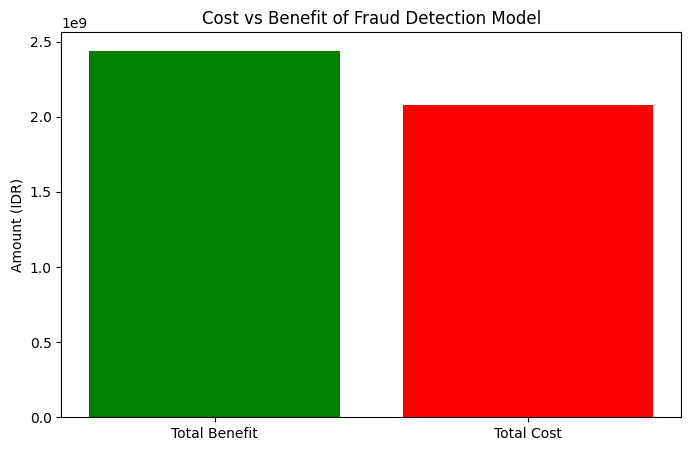

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define costs and benefits
ACQUISITION_COST = 500_000_000  # Software, hardware, security, development
OPERATION_COST = 300_000_000  # Migration, setup, monitoring, support
LEGAL_COST = 5_000_000  # Legal cost for fraud handling
FRAUD_HANDLING_COST = 200_000  # Per fraud case
LOSS_PER_FP = 100_000  # (Customer acquisition + lost profit)
PROFIT_PER_TN = 70_000  # Profit per legitimate transaction

# Extract transaction amounts for fraud cases
df_copy['Fraud_Loss'] = df_copy['amount'] * df_copy['isFraud']

# Identify TP, FP, FN, TN
TP = df_copy[(df_copy['isFraud'] == 1) & (df_copy['Model_3'] == 1)]
FP = df_copy[(df_copy['isFraud'] == 0) & (df_copy['Model_3'] == 1)]
FN = df_copy[(df_copy['isFraud'] == 1) & (df_copy['Model_3'] == 0)]
TN = df_copy[(df_copy['isFraud'] == 0) & (df_copy['Model_3'] == 0)]

# Calculate total benefits
benefit_tp = TP['amount'].sum()
benefit_tn = len(TN) * PROFIT_PER_TN
total_benefit = benefit_tp + benefit_tn

# Calculate total costs
cost_fn = FN['amount'].sum()
cost_fp = len(FP) * LOSS_PER_FP
total_fraud_handling = (len(TP) + len(FN)) * FRAUD_HANDLING_COST + LEGAL_COST
total_cost = ACQUISITION_COST + OPERATION_COST + total_fraud_handling + cost_fn + cost_fp

# Compute total utility and ROI
total_utility = total_benefit - total_cost
roi = (total_utility / total_cost) * 100

# Print results
print(f"Total Benefit: {total_benefit:,.0f}")
print(f"Total Cost: {total_cost:,.0f}")
print(f"Total Utility: {total_utility:,.0f}")
print(f"ROI: {roi:.2f}%")

# Visualization
plt.figure(figsize=(8, 5))
categories = ['Total Benefit', 'Total Cost']
values = [total_benefit, total_cost]
plt.bar(categories, values, color=['green', 'red'])
plt.ylabel('Amount (IDR)')
plt.title('Cost vs Benefit of Fraud Detection Model')
plt.show()


Your fraud detection model yields an ROI of 18.05%, indicating a positive return on investment. ✅

Key Takeaways:
Total Benefit (from fraud prevention and legitimate transactions) exceeds the total cost.
Total Utility (Net Return) is 375M, showing a solid gain after all expenses.
Costs are mainly driven by false positives (customer loss) and fraud handling expenses.